In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-taxi-fare-prediction/sample_submission.csv
/kaggle/input/new-york-city-taxi-fare-prediction/GCP-Coupons-Instructions.rtf
/kaggle/input/new-york-city-taxi-fare-prediction/train.csv
/kaggle/input/new-york-city-taxi-fare-prediction/test.csv


პირველ რიგში, წავიკითხოთ მონაცემები და ვნახოთ პირველი 10 რიგი დაახლოებითი წარმოდგენა რომ შეგვექმნას რა ტიპის ცხრილს ვეხებით:

In [2]:
pd.options.display.max_rows = 20
train_data = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/train.csv', nrows = 10_000_000)
num_rows = train_data.shape[0]

print("Number of rows in train_data:", num_rows)

Number of rows in train_data: 10000000


In [3]:
train_data.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [4]:
test_data = pd.read_csv('/kaggle/input/new-york-city-taxi-fare-prediction/test.csv')
test_data.head(10)

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1
5,2012-12-01 21:12:12.0000005,2012-12-01 21:12:12 UTC,-73.960983,40.765547,-73.979177,40.740053,1
6,2011-10-06 12:10:20.0000001,2011-10-06 12:10:20 UTC,-73.949013,40.773204,-73.959622,40.770893,1
7,2011-10-06 12:10:20.0000003,2011-10-06 12:10:20 UTC,-73.777282,40.646636,-73.985083,40.759368,1
8,2011-10-06 12:10:20.0000002,2011-10-06 12:10:20 UTC,-74.014099,40.709638,-73.995106,40.741365,1
9,2014-02-18 15:22:20.0000002,2014-02-18 15:22:20 UTC,-73.969582,40.765519,-73.980686,40.770725,1


გავიგოთ სვეტების მონაცემთა ტიპები:

In [5]:
train_data.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
test_data.dtypes

key                   object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

სატესტო მონაცემებში არ ვხვდებით fare_amount სვეტს.
ახლა გავიგოთ ამ ცხრილების დახასიათება (მოდა, მაქსიმუმი, მინიმუმი...)

In [7]:
train_data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.000000e+07,1.000000e+07,1.000000e+07,9.999931e+06,9.999931e+06,1.000000e+07
mean,1.133854e+01,-7.250775e+01,3.991934e+01,-7.250897e+01,3.991913e+01,1.684793e+00
std,9.799930e+00,1.299421e+01,9.322539e+00,1.287532e+01,9.237280e+00,1.323423e+00
min,-1.077500e+02,-3.439245e+03,-3.492264e+03,-3.426601e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396710e+01,4.076712e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,1.273310e+03,3.457626e+03,3.344459e+03,3.457622e+03,3.351403e+03,2.080000e+02


In [8]:
test_data.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


პირველ რიგში დავაკვირდეთ, რომ fare_amount-ის მინიმალური მნიშვნელობა სატრენინგო ცხრილში უარყოფითია, რაც შეუძლებელია (გადასახადი უარყოფითი ვერ იქნება). მოვაშოროთ ასეთი მონაცემები:

In [9]:
print("Size before", len(train_data))
train_data = train_data[train_data.fare_amount >= 0]
print("Size after", len(train_data))

Size before 10000000
Size after 9999580


ლოგიკურად, მგზავრთა რაოდენობა ტაქსში მგზავრობისას ვერ იქნება 0-ზე ნაკლები და 6-ზე მეტი (სატესტო მონაცემებშიც ასეა), ამიტომ ასეთი მონაცემებიც გავფილტროთ სატრენინგო მონაცემებში. 0-ს ჯერჯერობით ვტოვებ, რადგან შეიძლება მგზავრმა საერთოდ არ იმგზავრა და გააუქმა მგზავრობა.

In [10]:
print("Size before", len(train_data))
train_data = train_data[(train_data.passenger_count >= 0) & (train_data.passenger_count <= 6)]
print("Size after", len(train_data))

Size before 9999580
Size after 9999563


გადავიდეთ კოორდინატებზე. ზოგადად, განედის (latitude) მნიშვნელობა შეიძლება იყოს 0-დან 90 გრადუსამდე ეკვატორის ორივე მხარეს (+-), ხოლო გრძედის (longitude) მნიშვნელობა კი 0-დან 180 გრადუსამდე გრინვიჩის მერიდიანის ორივე მხარეს (+-). გავიგოთ სატრენინგო და სატესტო მონაცემებში მინიმალური/მაქსიმალური მნიშვნელობები კოორდინატებისთვის:

In [11]:
print("min train pickup latitude", train_data.pickup_latitude.min())
print("max train pickup latitude", train_data.pickup_latitude.max())
print("min train pickup longitude", train_data.pickup_longitude.min())
print("max train pickup longitude", train_data.pickup_longitude.max())
print("--------------")
print("min test pickup latitude", test_data.pickup_latitude.min())
print("max test pickup latitude", test_data.pickup_latitude.max())
print("min test pickup longitude", test_data.pickup_longitude.min())
print("max test pickup longitude", test_data.pickup_longitude.max())
print("******************************************")
print("min train dropoff latitude", train_data.dropoff_latitude.min())
print("max train dropoff latitude", train_data.dropoff_latitude.max())
print("min train dropoff longitude", train_data.dropoff_longitude.min())
print("max train dropoff longitude", train_data.dropoff_longitude.max())
print("--------------")
print("min test dropoff latitude", test_data.dropoff_latitude.min())
print("max test dropoff latitude", test_data.dropoff_latitude.max())
print("min test dropoff longitude", test_data.dropoff_longitude.min())
print("max test dropoff longitude", test_data.dropoff_longitude.max())

min train pickup latitude -3492.263768
max train pickup latitude 3344.459268
min train pickup longitude -3439.245062
max train pickup longitude 3457.625683
--------------
min test pickup latitude 40.573143
max test pickup latitude 41.709555
min test pickup longitude -74.252193
max test pickup longitude -72.986532
******************************************
min train dropoff latitude -3488.079513
max train dropoff latitude 3351.403027
min train dropoff longitude -3426.600617
max train dropoff longitude 3457.62235
--------------
min test dropoff latitude 40.568973
max test dropoff latitude 41.696683
min test dropoff longitude -74.263242
max test dropoff longitude -72.990963


გავითვალისწინოთ ნიუ იურკის გრძედები და განედები და ამოვაკლოთ ცუდი მნიშვნელობები (https://en.wikipedia.org/wiki/New_York_(state))

In [12]:
min_latitude = 40.30
max_latitude = 45.1
min_longitude = -79.46
max_longitude = -71.51

print("Size before", len(train_data))
train_data = train_data[
    (train_data.pickup_latitude >= min_latitude) & (train_data.pickup_latitude <= max_latitude) &
    (train_data.pickup_longitude >= min_longitude) & (train_data.pickup_longitude <= max_longitude) &
    (train_data.dropoff_latitude >= min_latitude) & (train_data.dropoff_latitude <= max_latitude) &
    (train_data.dropoff_longitude >= min_longitude) & (train_data.dropoff_longitude <= max_longitude)
]
print("Size after", len(train_data))

Size before 9999563
Size after 9789074


ახლა უკვე ნამდვილად ნიუ იორკში ვართ :)
დავუბრუნდეთ fare_amount-ებს. მიუხედავად იმისა, რომ უარყოფითი მნიშვნელობები გამოვრიცხეთ, ჯერ კიდევ ბევრი არალოგიკური მნიშვნელობა დარჩა. ასევე, საიტის მიხედვით (https://www.numbeo.com/taxi-fare/in/New-York), შეგვიძლია კიდევ უფრო მეტად გავფილტროთ მონაცემები. ჩავთვალოთ, რომ საფასური მინიმუმ 0 დოლარია (რაც უკვე გვაქვს), ხოლო მაქსიმუმზე ჯერ დასკვნებს არ გავაკეთებ.

ცხრილში დავამატოთ სვეტი სადაც გვექნება შენახული საწყის და საბოლოო წერტილებს შორის მანძილი. გამოვიყენებ სტატიაში განხილულ ფორმულას, უბრალოდ გავავექტორიზირებ, რათა დიდი დრო არ დასჭირდეს ყველა მონაცემისთვის დისტანციის დათვლას (https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points)

In [13]:
import numpy as np

def vectorized_haversine(df):
    lat1, lon1, lat2, lon2 = df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude']
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))

    r = 6371

    d = c * r
    df['distance'] = d
    return d

In [14]:
vectorized_haversine(train_data)
vectorized_haversine(test_data)

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [15]:
train_data.distance.describe()

count    9.789074e+06
mean     3.336459e+00
std      3.985754e+00
min      0.000000e+00
25%      1.253417e+00
50%      2.152299e+00
75%      3.908628e+00
max      5.945121e+02
Name: distance, dtype: float64

როგორც ჩანს მინიმალური მანძილი 0-ის ტოლია, რაც შესაძლებელია მხოლოდ მაშინ, თუ მგზავრი არ გამოცხადდა.

გავიგოთ ეს მონაცემები სატესტო ბაზისთვისაც:

In [16]:
print(test_data.head(10))
test_data.distance.describe()

                           key          pickup_datetime  pickup_longitude  \
0  2015-01-27 13:08:24.0000002  2015-01-27 13:08:24 UTC        -73.973320   
1  2015-01-27 13:08:24.0000003  2015-01-27 13:08:24 UTC        -73.986862   
2  2011-10-08 11:53:44.0000002  2011-10-08 11:53:44 UTC        -73.982524   
3  2012-12-01 21:12:12.0000002  2012-12-01 21:12:12 UTC        -73.981160   
4  2012-12-01 21:12:12.0000003  2012-12-01 21:12:12 UTC        -73.966046   
5  2012-12-01 21:12:12.0000005  2012-12-01 21:12:12 UTC        -73.960983   
6  2011-10-06 12:10:20.0000001  2011-10-06 12:10:20 UTC        -73.949013   
7  2011-10-06 12:10:20.0000003  2011-10-06 12:10:20 UTC        -73.777282   
8  2011-10-06 12:10:20.0000002  2011-10-06 12:10:20 UTC        -74.014099   
9  2014-02-18 15:22:20.0000002  2014-02-18 15:22:20 UTC        -73.969582   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0        40.763805         -73.981430         40.743835                1   


count    9914.000000
mean        3.435371
std         3.972374
min         0.000000
25%         1.298277
50%         2.217412
75%         4.045302
max        99.996040
Name: distance, dtype: float64

100 კილომეტრზე მეტის მგზავრობა ნიუ იორკში წარმოუდგენელია :)

In [17]:
print("Size before", len(train_data))
train_data = train_data[train_data.distance < 100]
print("Size after", len(train_data))

Size before 9789074
Size after 9788074


მინიმუმი აქაც 0-ია, ამიტომ პირდაპირ არ ამოვშალთ ასეთი row-ები. სტატიის მიხედვით (https://www.nyc.gov/site/tlc/passengers/taxi-fare.page#:~:text=%243.00%20initial%20charge.,Dutchess%2C%20Orange%20or%20Putnam%20Counties.) ნიუ იორკში ტაქსის მინიმალური გადასახადი არის 3 დოლარი (კიდევ ბევრ სტატიაში ეწერა, რომ 3 დოლარია მინიმალური გადასახადი). თუკი მგზავრი არ გამოცხადდება, 3 დოლარის გადახდა მაინც მოუწევს. ამიტომ ისეთი მონაცემები ამოვშალოთ, რომლებშიც მგზავრობა არ შედგა (distance = 0) და fare_amount 3 დოლარზე მეტი იყო.

In [18]:
print("Size before", len(train_data))
train_data = train_data[~((train_data.distance == 0) & (train_data.fare_amount > 3))]
print("Size after", len(train_data))

Size before 9788074
Size after 9693247


მოდი, key და თარიღი გავშალოთ; ამოვიღოთ წელი, თვე, დღე, საათი, კვირის დღე, რაც შეიძლება გამოგვადგეს, რადგან ვიცით, რომ რაღაც პერიოდებში ტაქსზე მოთხოვნა მეტია.

აქვე დავიმახსოვრებ სატესტო მონაცემების key-ებს, რაც ბოლოს დამჭირდება შედეგის დასასაბმითებლად.

In [19]:
test_keys = test_data['key']

train_data["key"] = pd.to_datetime(train_data["key"])
train_data["pickup_datetime"] = pd.to_datetime(train_data["pickup_datetime"])
test_data["key"] = pd.to_datetime(test_data["key"])
test_data["pickup_datetime"] = pd.to_datetime(test_data["pickup_datetime"])

In [20]:
train_data['Year'] = train_data['pickup_datetime'].dt.year
train_data['Month'] = train_data['pickup_datetime'].dt.month
train_data['Day'] = train_data['pickup_datetime'].dt.day
train_data['DayOfWeek'] = train_data['pickup_datetime'].dt.dayofweek
train_data['Hour'] = train_data['pickup_datetime'].dt.hour

In [21]:
test_data['Year'] = test_data['pickup_datetime'].dt.year
test_data['Month'] = test_data['pickup_datetime'].dt.month
test_data['Day'] = test_data['pickup_datetime'].dt.day
test_data['DayOfWeek'] = test_data['pickup_datetime'].dt.dayofweek
test_data['Hour'] = test_data['pickup_datetime'].dt.hour

In [22]:
train_data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Day,DayOfWeek,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


In [23]:
test_data.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Day,DayOfWeek,Hour
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2015,1,27,1,13
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21


ახლა დავაკვირდეთ გადასახადებს საათების, დღეების, თვეების, წლების მიხედვით. ალბათ, შეგვეძლება რაღაც დასკვნების გაკეთება (მაგალითად, (ვვარაუდობ) პიკის საათებში წესით მეტი უნდა იყოს გადასახდელი).

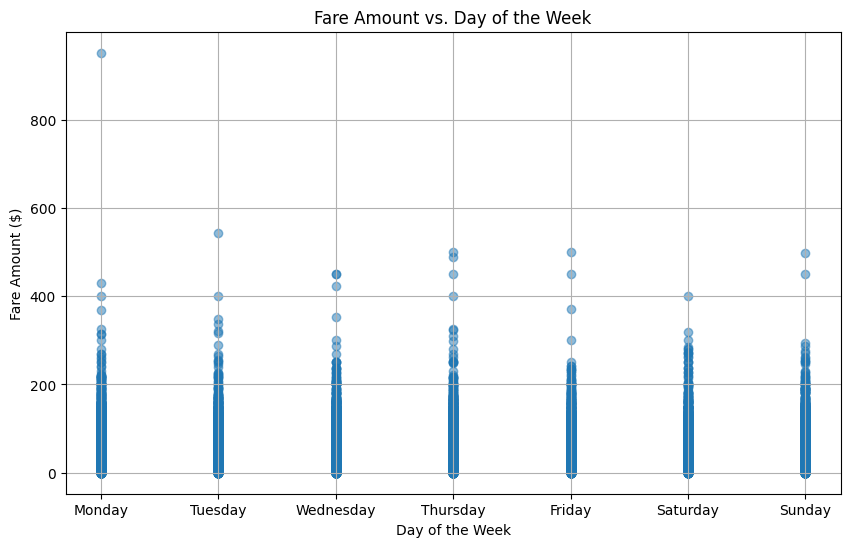

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(train_data['DayOfWeek'], train_data['fare_amount'], alpha=0.5)
plt.xlabel('Day of the Week')
plt.ylabel('Fare Amount ($)')
plt.title('Fare Amount vs. Day of the Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()

დღეებმა ბევრი არაფერი არ მოგვცა, თანხები თითქმის თანაბრადაა (ერთადერთი, ორშაბათ დღეს თუ დავაკვირდებით ერთი წერტილი ზედემეტად ზემოთაა, რაც, ალბათ, აუთლაიერია).

ახლა საათებს დავაკვირდეთ.

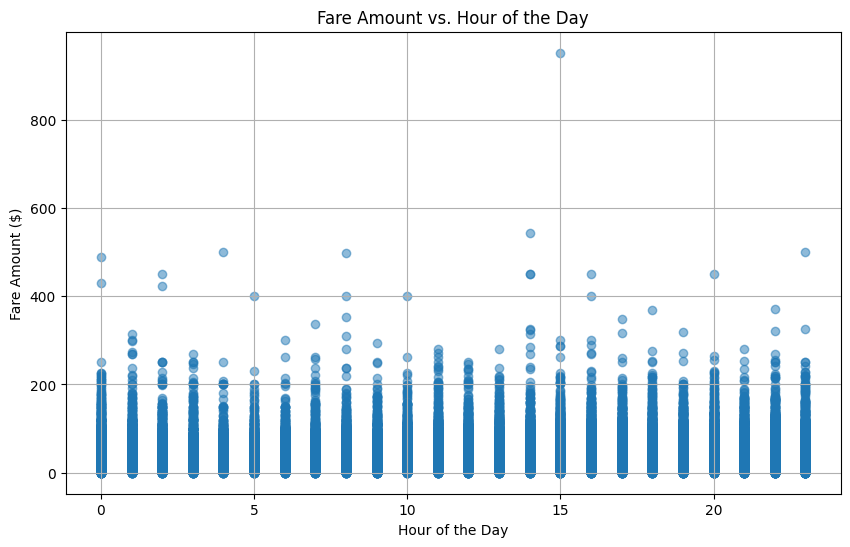

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['Hour'], train_data['fare_amount'], alpha=0.5)
plt.xlabel('Hour of the Day')
plt.ylabel('Fare Amount ($)')
plt.title('Fare Amount vs. Hour of the Day')
plt.grid(True)
plt.show()

ჩემი მოლოდინი, რომ პიკის საათში უმაღლესი წერტილები იქნებოდა არ გამართლდა, რაც უცნაურია.
წლებიც ვნახოთ.

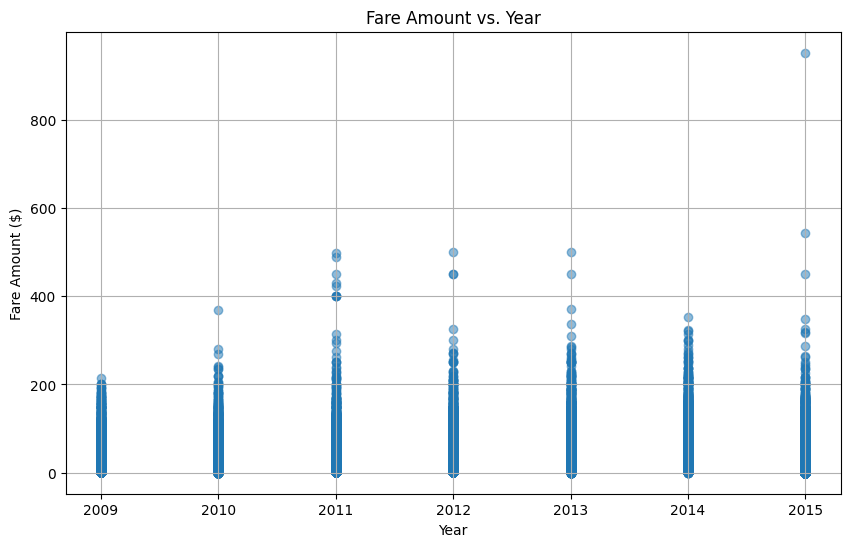

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['Year'], train_data['fare_amount'], alpha=0.5)
plt.xlabel('Year')
plt.ylabel('Fare Amount ($)')
plt.title('Fare Amount vs. Year')
plt.grid(True)
plt.show()

ყველაზე თვალსაჩინო მგონი მაინც წლებია: 2009 წლის შემდეგ გადასახადები იზრდება.

ვნახოთ თვეებიც:

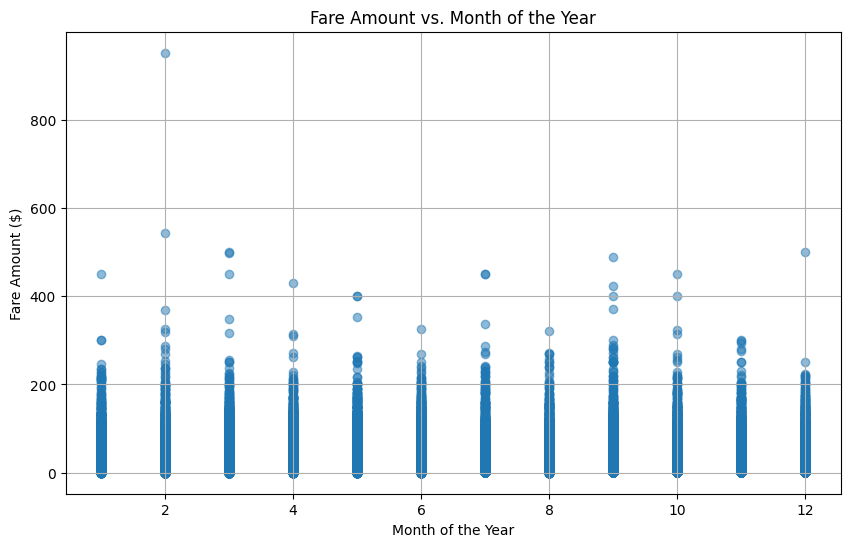

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['Month'], train_data['fare_amount'], alpha=0.5)
plt.xlabel('Month of the Year')
plt.ylabel('Fare Amount ($)')
plt.title('Fare Amount vs. Month of the Year')
plt.grid(True)
plt.show()

დავაკვირდეთ დისტანციებს და გადასახადებსაც

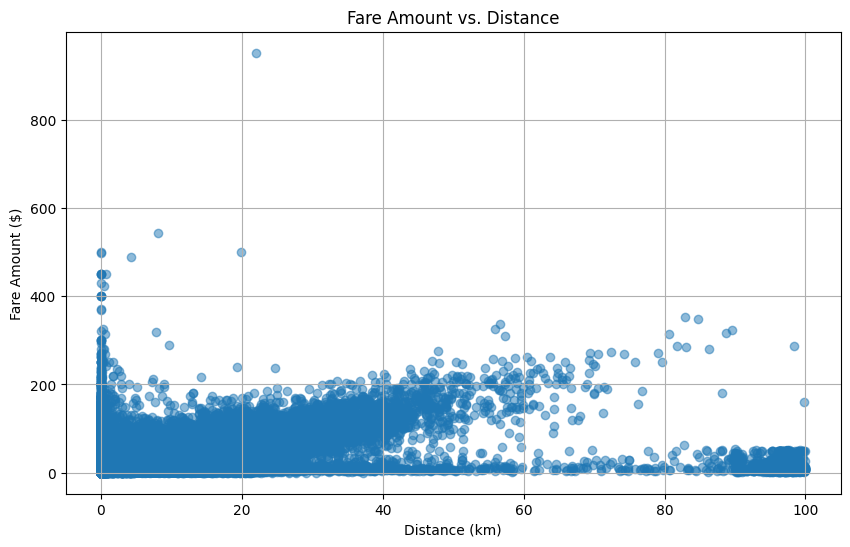

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['distance'], train_data['fare_amount'], alpha=0.5)
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.title('Fare Amount vs. Distance')
plt.grid(True)
plt.show()

არ არის ლოგიკური ის, რომ ხალხმა იმგზავრა და მაინც 3 დოლარზე ნაკლები გადაიხადეს (მინიმალური საფასური 3 დოლარი იყო). ასეთი მონაცემები მოვაშოროთ.

In [29]:
train_data[(train_data.fare_amount <= 3) & (train_data.distance  > 0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Day,DayOfWeek,Hour
226,2012-03-29 03:51:00.000000200,2.5,2012-03-29 03:51:00+00:00,-73.989142,40.720105,-73.988777,40.720662,1,0.069154,2012,3,29,3,3
496,2013-02-15 12:13:00.000000185,3.0,2013-02-15 12:13:00+00:00,-73.994313,40.735362,-73.997212,40.736810,1,0.292549,2013,2,15,4,12
551,2011-04-22 09:02:09.000000400,2.9,2011-04-22 09:02:09+00:00,-73.964774,40.772788,-73.963266,40.774752,1,0.252622,2011,4,22,4,9
630,2009-01-10 16:28:00.000000860,2.9,2009-01-10 16:28:00+00:00,-73.977417,40.757653,-73.974607,40.756757,1,0.256796,2009,1,10,5,16
782,2014-08-25 20:37:22.000000100,3.0,2014-08-25 20:37:22+00:00,-74.007472,40.740880,-74.008959,40.738234,1,0.319784,2014,8,25,0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9998651,2009-02-24 16:51:00.000000173,2.5,2009-02-24 16:51:00+00:00,-73.776888,40.644987,-73.776808,40.645653,1,0.074363,2009,2,24,1,16
9998859,2010-06-04 07:57:00.000000129,2.9,2010-06-04 07:57:00+00:00,-73.960817,40.655058,-73.959210,40.656105,2,0.178692,2010,6,4,4,7
9998952,2014-02-20 20:39:00.000000220,2.5,2014-02-20 20:39:00+00:00,-73.981963,40.769517,-73.982065,40.770792,3,0.142034,2014,2,20,3,20
9999337,2009-07-25 23:51:00.000000161,2.9,2009-07-25 23:51:00+00:00,-73.957302,40.716258,-73.957522,40.716072,1,0.027777,2009,7,25,5,23


ასეთი მონაცემები არ წავშალოთ (ზედმეტად ბევრია) და (https://www.nyc.gov/site/tlc/passengers/taxi-fare.page#:~:text=%243.00%20initial%20charge.,Dutchess%2C%20Orange%20or%20Putnam%20Counties.) სტატიის მიხედვით გამოვთვალოთ რეალურად რა დაჯდებოდა მგზავრობა (საწყისი ფასი 3 დოლარი და ყოველ 1/5 მილზე +70 ცენტი).
1/5 მილი არის 321.869 მეტრი = 0.321869 კილომეტრი

In [30]:
distance_per = 0.321869
fare_increase_per_mile = 0.7
mask = (train_data['fare_amount'] < 3) & (train_data['distance'] > 0)
train_data.loc[mask, 'fare_amount'] = 3 + (train_data.loc[mask, 'distance'] / distance_per) * fare_increase_per_mile

In [31]:
train_data[(train_data.distance > 0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Day,DayOfWeek,Hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,2012-08-12 01:18:00.000000208,5.7,2012-08-12 01:18:00+00:00,-73.999464,40.728452,-73.993299,40.742100,2,1.604023,2012,8,12,6,1
9999996,2013-08-07 10:28:00.000000147,5.5,2013-08-07 10:28:00+00:00,-73.968467,40.759367,-73.964967,40.769027,1,1.113854,2013,8,7,2,10
9999997,2013-10-29 08:29:00.000000820,14.0,2013-10-29 08:29:00+00:00,-73.997952,40.733717,-73.973448,40.759122,5,3.498755,2013,10,29,1,8
9999998,2012-04-07 16:41:33.000000400,10.5,2012-04-07 16:41:33+00:00,-73.992700,40.752021,-73.964705,40.772849,1,3.304974,2012,4,7,5,16


ნახაზს თუ დავაკვირდებით კიდევ რამდენიმე არალოგიკურ ფაქტორს შევამჩნევთ. მაგალითად, თუ დავაკვირდებით, 200 კილომეტრზე მეტი ვინც გაიარა მაქსიმუმ 50 დოლარზე მეტი არ გადაუხდია, რაც აფსურდია. ეს მონაცემებიც ანალოგიურად ჩავანაცვლოთ.

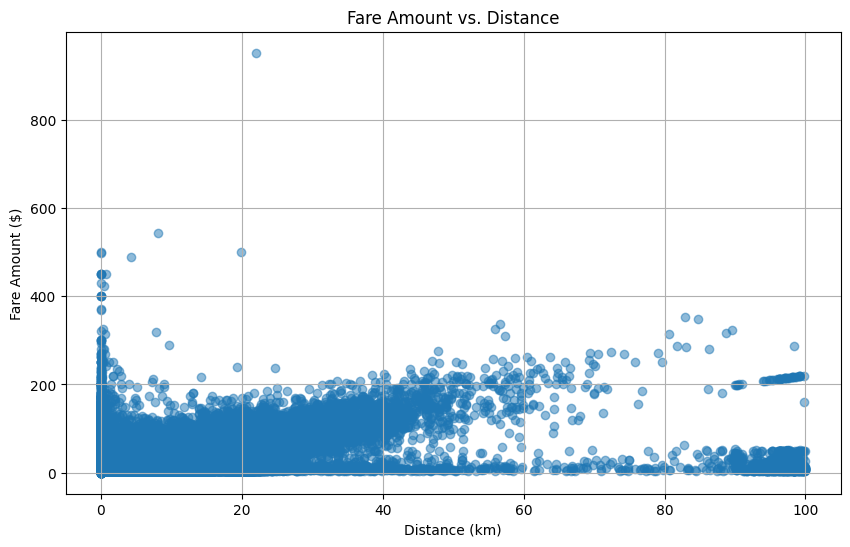

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['distance'], train_data['fare_amount'], alpha=0.5)
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.title('Fare Amount vs. Distance')
plt.grid(True)
plt.show()

პირველ რიგში წრფივი რეგრესიის მოდელი ავაგოთ.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = train_data.drop(['key','fare_amount','pickup_datetime'], axis=1)
y = train_data['fare_amount']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

LR = LinearRegression()
LR.fit(X_train, y_train)

y_train_pred = LR.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

y_test_pred = LR.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Train Root Mean Squared Error:", rmse_train)
print("Test Root Mean Squared Error:", rmse_test)

Train Root Mean Squared Error: 5.016702066697223
Test Root Mean Squared Error: 4.937205415845298


შედეგები ერთმანეთს თითქმის დაემთხვა, რაც კარგია. სავარაუდოდ, ოვერფიტზე არ ვართ გასული. შედეგიც ნორმალურია, რახან უბრალო წრფივ რეგრესიას ვიყენებთ.

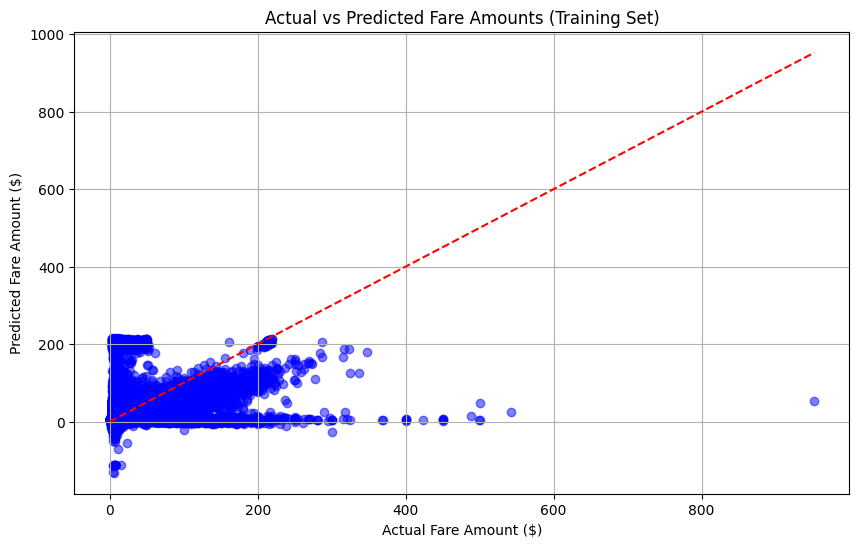

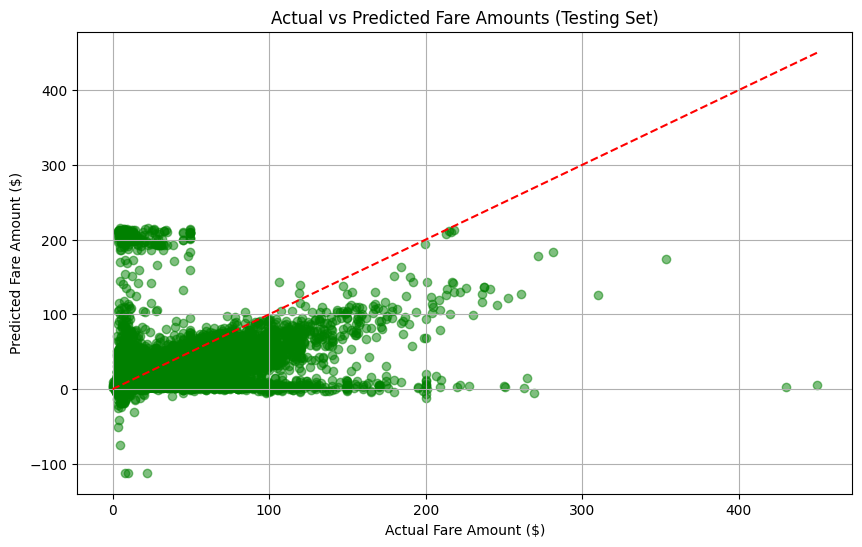

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Fare Amount ($)')
plt.ylabel('Predicted Fare Amount ($)')
plt.title('Actual vs Predicted Fare Amounts (Training Set)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Fare Amount ($)')
plt.ylabel('Predicted Fare Amount ($)')
plt.title('Actual vs Predicted Fare Amounts (Testing Set)')
plt.grid(True)
plt.show()

ნახაზი დიდად ლამაზი არაა, მაგრამ წრფივი რეგრესიის მოდელისგან დიდი მოლოდინი არც მქონია...

 უფრო სწორი ვარაუდები რომ მივიღოთ, გამოვიყენოთ უკეთესი მოდელი, რომლის დატუნვაც შეგვეძლება, როგორიცაა, მაგალითად, XGBoost. მოდი ჯერ უბრალო პარამეტრებზე ვნახოთ რას მივიღებთ. XGBoost-ის საშუალებით შევძლებთ სხვადასხვა ტიპის მონაცემთა დამუშავებას და მოდელის ეფექტურობის უზრუნველყოფას.

In [35]:
import xgboost as xgb

def XGBoost(X_train, X_test, y_train, y_test, xgb_params, boost_rounds):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    evals = [(dtrain, 'train'), (dtest, 'test')]
    evals_result = {}

    xgb_model = xgb.train(params=xgb_params, dtrain=dtrain, num_boost_round=boost_rounds,
                          early_stopping_rounds=30, evals=evals, evals_result=evals_result, verbose_eval=10)

    min_rmse_train = min(evals_result['train']['rmse'])
    min_rmse_test = min(evals_result['test']['rmse'])

    print(f"Minimum RMSE on training set: {min_rmse_train}")
    print(f"Minimum RMSE on test set: {min_rmse_test}")

    return xgb_model

xgb_params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
xgbm = XGBoost(X_train, X_test, y_train, y_test, xgb_params, 100)

[0]	train-rmse:7.37663	test-rmse:7.34605
[10]	train-rmse:3.85683	test-rmse:3.79477
[20]	train-rmse:3.73058	test-rmse:3.67064
[30]	train-rmse:3.66423	test-rmse:3.61122
[40]	train-rmse:3.62186	test-rmse:3.57663
[50]	train-rmse:3.58218	test-rmse:3.54438
[60]	train-rmse:3.54881	test-rmse:3.51949
[70]	train-rmse:3.52330	test-rmse:3.50173
[80]	train-rmse:3.50062	test-rmse:3.48697
[90]	train-rmse:3.48317	test-rmse:3.47667
[99]	train-rmse:3.46974	test-rmse:3.46766
Minimum RMSE on training set: 3.4697355165079813
Minimum RMSE on test set: 3.4676593159031226


max_depth პარამეტრი დეფოლტად 6-ია. მოდი გაზრდა ვცადოთ. ხის სიღრმის გაზრდა უფრო კომპლექსურს გახდის ხეს (თუმცაღა იმის ხარჯზე, რომ უფრო მეტ დეტალს აკვირდება მოდელი), თუმცა საშიშია ოვერფიტინგის თვალსაზრისით. n_estimators პარამეტრს შევამცირებ, რადგან ძალიან დიდ დროს წაიღებს...

In [36]:
xgb_params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
xgb_params['max_depth'] = 25
xgbm = XGBoost(X_train, X_test, y_train, y_test, xgb_params, 20)

[0]	train-rmse:7.07379	test-rmse:7.21585
[10]	train-rmse:1.37533	test-rmse:3.67529
[19]	train-rmse:0.91834	test-rmse:3.68093
Minimum RMSE on training set: 0.9183422172132806
Minimum RMSE on test set: 3.6743971015472754


მართლაც, კარგად გამოჩნდა, რომ ოვერფიტინგთან გვაქვს საქმე. მოდი შედარებით ნაკლებად გავზარდოთ ხის სიღრმე.

In [37]:
xgb_params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
xgb_params['max_depth'] = 8
xgbm = XGBoost(X_train, X_test, y_train, y_test, xgb_params, 100)

[0]	train-rmse:7.31434	test-rmse:7.28578
[10]	train-rmse:3.68747	test-rmse:3.64451
[20]	train-rmse:3.53819	test-rmse:3.53807
[30]	train-rmse:3.46002	test-rmse:3.49531
[40]	train-rmse:3.38925	test-rmse:3.46294
[50]	train-rmse:3.34003	test-rmse:3.44154
[60]	train-rmse:3.29710	test-rmse:3.42808
[70]	train-rmse:3.26088	test-rmse:3.42323
[80]	train-rmse:3.23104	test-rmse:3.41608
[90]	train-rmse:3.20343	test-rmse:3.41041
[99]	train-rmse:3.18212	test-rmse:3.40633
Minimum RMSE on training set: 3.182124435717808
Minimum RMSE on test set: 3.406326875058526


rmse შემცირდა, თუმცა 0.3 არაა პატარა განსხვავება. აქაც ოვერფიტინგია. მოდი დეფოლტ მნიშვნელობაზე ნაკლებიც ავიღოთ და ვნახოთ რა ხდება.

In [38]:
xgb_params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
xgb_params['max_depth'] = 4
xgbm = XGBoost(X_train, X_test, y_train, y_test, xgb_params, 100)

[0]	train-rmse:7.50047	test-rmse:7.46838
[10]	train-rmse:4.03074	test-rmse:3.97016
[20]	train-rmse:3.88530	test-rmse:3.81994
[30]	train-rmse:3.83265	test-rmse:3.76752
[40]	train-rmse:3.79179	test-rmse:3.72408
[50]	train-rmse:3.76650	test-rmse:3.69838
[60]	train-rmse:3.74127	test-rmse:3.67248
[70]	train-rmse:3.72704	test-rmse:3.65796
[80]	train-rmse:3.71319	test-rmse:3.64359
[90]	train-rmse:3.69486	test-rmse:3.62590
[99]	train-rmse:3.68301	test-rmse:3.61448
Minimum RMSE on training set: 3.6830114479710825
Minimum RMSE on test set: 3.6144817218279868


ოვერფიტი შემცირდა, თუმცა ცდომილების გაზრდის ხარჯზე.

ვცადოთ learning rate-ის გაზრდაც (დეფოლტ მნიშვნელობა 0.1 იყო), რაც სავარაუდოდ შეგვიმცირებს ოვერფიტინგს:

In [39]:
xgb_params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
xgb_params['max_depth'] = 8
xgb_params['learning_rate'] = 0.05
xgbm = XGBoost(X_train, X_test, y_train, y_test, xgb_params, 200)

[0]	train-rmse:9.23356	test-rmse:9.21083
[10]	train-rmse:6.36480	test-rmse:6.33214
[20]	train-rmse:4.91406	test-rmse:4.87426
[30]	train-rmse:4.24597	test-rmse:4.20375
[40]	train-rmse:3.94876	test-rmse:3.90582
[50]	train-rmse:3.80787	test-rmse:3.76686
[60]	train-rmse:3.73106	test-rmse:3.69257
[70]	train-rmse:3.68240	test-rmse:3.64692
[80]	train-rmse:3.64947	test-rmse:3.61940
[90]	train-rmse:3.62096	test-rmse:3.59545
[100]	train-rmse:3.59492	test-rmse:3.57447
[110]	train-rmse:3.57474	test-rmse:3.56136
[120]	train-rmse:3.55539	test-rmse:3.54925
[130]	train-rmse:3.53806	test-rmse:3.53939
[140]	train-rmse:3.51926	test-rmse:3.52653
[150]	train-rmse:3.50396	test-rmse:3.51638
[160]	train-rmse:3.49064	test-rmse:3.50943
[170]	train-rmse:3.47733	test-rmse:3.50230
[180]	train-rmse:3.46448	test-rmse:3.49607
[190]	train-rmse:3.45011	test-rmse:3.48759
[199]	train-rmse:3.43982	test-rmse:3.48239
Minimum RMSE on training set: 3.439817374300981
Minimum RMSE on test set: 3.4823912703345847


გამოდის, რომ ყველაზე კარგი შედეგი მაინც დეფოლტ მნიშვნელობებმა მოგვცა.

ერთიც ვცადოთ დეფოლტ მნიშვნელობებით, თუმცა learning rate-ის შემცირებით. n_estimators გავზრდი ამ შემთხვევაში რათა დავინახოთ, რომ კარგ შედეგზე დიდ დროში ესეც გადის.

In [40]:
xgb_params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
xgb_params['learning_rate'] = 0.05
xgbm = XGBoost(X_train, X_test, y_train, y_test, xgb_params, 300)

[0]	train-rmse:9.24301	test-rmse:9.21999
[10]	train-rmse:6.44762	test-rmse:6.41323
[20]	train-rmse:5.04186	test-rmse:4.99712
[30]	train-rmse:4.38898	test-rmse:4.33716
[40]	train-rmse:4.09570	test-rmse:4.03920
[50]	train-rmse:3.95248	test-rmse:3.89281
[60]	train-rmse:3.87998	test-rmse:3.82019
[70]	train-rmse:3.83574	test-rmse:3.77619
[80]	train-rmse:3.79584	test-rmse:3.73474
[90]	train-rmse:3.76646	test-rmse:3.70493
[100]	train-rmse:3.74758	test-rmse:3.68716
[110]	train-rmse:3.73325	test-rmse:3.67449
[120]	train-rmse:3.71897	test-rmse:3.66135
[130]	train-rmse:3.70629	test-rmse:3.64978
[140]	train-rmse:3.69506	test-rmse:3.63937
[150]	train-rmse:3.68483	test-rmse:3.62991
[160]	train-rmse:3.67674	test-rmse:3.62264
[170]	train-rmse:3.66854	test-rmse:3.61521
[180]	train-rmse:3.65895	test-rmse:3.60690
[190]	train-rmse:3.64949	test-rmse:3.59820
[200]	train-rmse:3.64038	test-rmse:3.59022
[210]	train-rmse:3.63323	test-rmse:3.58408
[220]	train-rmse:3.62533	test-rmse:3.57707
[230]	train-rmse:3.619

აქაც კარგი შედეგი მივიღეთ, სხვაობა ტესტის და ტრენინგის rmse-ებს შორის მცირეა.
მოდი მაინც დეფოლტ მოდელს გამოვიყენებ მეტი n_estimators პარამეტრით საბმიშენისთვის, რახან rmse ნაკლებია.

In [41]:
test_pred = test_data.drop(['key','pickup_datetime'],axis=1)
test_pred.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,Year,Month,Day,DayOfWeek,Hour
0,-73.973320,40.763805,-73.981430,40.743835,1,2.323260,2015,1,27,1,13
1,-73.986862,40.719383,-73.998886,40.739201,1,2.425353,2015,1,27,1,13
2,-73.982524,40.751260,-73.979654,40.746139,1,0.618628,2011,10,8,5,11
3,-73.981160,40.767807,-73.990448,40.751635,1,1.961033,2012,12,1,5,21
4,-73.966046,40.789775,-73.988565,40.744427,1,5.387301,2012,12,1,5,21


In [42]:
xgb_params = {'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
xgbm = XGBoost(X_train, X_test, y_train, y_test, xgb_params, 100)
my_prediction = xgbm.predict(xgb.DMatrix(test_pred))

[0]	train-rmse:7.37663	test-rmse:7.34605
[10]	train-rmse:3.85683	test-rmse:3.79477
[20]	train-rmse:3.73058	test-rmse:3.67064
[30]	train-rmse:3.66423	test-rmse:3.61122
[40]	train-rmse:3.62186	test-rmse:3.57663
[50]	train-rmse:3.58218	test-rmse:3.54438
[60]	train-rmse:3.54881	test-rmse:3.51949
[70]	train-rmse:3.52330	test-rmse:3.50173
[80]	train-rmse:3.50062	test-rmse:3.48697
[90]	train-rmse:3.48317	test-rmse:3.47667
[99]	train-rmse:3.46974	test-rmse:3.46766
Minimum RMSE on training set: 3.4697355165079813
Minimum RMSE on test set: 3.4676593159031226


In [43]:
my_prediction = np.round(my_prediction, 2)
my_prediction

array([10.33, 11.04,  4.59, ..., 52.47, 19.53,  6.57], dtype=float32)

In [44]:
submission = pd.DataFrame({"key": test_keys,"fare_amount": my_prediction},columns = ['key','fare_amount'])
submission.to_csv('submission.csv',index=False)
print(os.listdir('.'))

['submission.csv', '__notebook__.ipynb']
